Ejemplo **Cluster usando K-means**

Este enfoque nos permite agrupar los datos en un número específico de clústeres, de manera que los puntos de datos en el mismo grupo estén relacionados, mientras que los ubicados en otro clúster están más lejanos. Esta distancia es medida frecuentemente a través de la distancia euclidiana. En otras palabras, el algoritmo K-Means intenta minimizar las distancias de los datos dentro de un mismo clúster y maximizar la distancia entre los diferentes clústeres.

Es el algoritmo mas utilizado en las tecnicas de aprendizaje no supervisado.
Este algoritmo busca a traves de los centroides ir acercando los puntos mediante el movimiento de centroides, menor distancia intra centroides y mayor distancia extracentroides

In [ ]:
#importamos librerias
import pandas as pd               # manejo de base de datos
import numpy as np                # uso matrices
import matplotlib.pyplot as plt   #para graficar
import seaborn as sns             #mejorar graficos
import warnings                   #manejo de advertencias
warnings.filterwarnings('ignore')


In [ ]:
# cargar los datos que estan separados por tabulaciones
df_mark = pd.read_excel("01 AMS 31MAY.xlsx")

In [ ]:
#para poder observar todas las variables
#cuando son muchas, por default no se muestran
pd.set_option('display.max_columns',100)

In [ ]:
#informacion de el tipo de dato de cada variable
df_mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Marca_temporal            19 non-null     object
 1   Nombre_de_usuario         19 non-null     object
 2   Matricula                 19 non-null     int64 
 3   Genero                    19 non-null     object
 4   Semestre                  19 non-null     object
 5   Carrera                   19 non-null     object
 6   Modalidad                 19 non-null     object
 7   Edad                      19 non-null     int64 
 8   whatsApp con el profesor  19 non-null     object
 9   MER1                      19 non-null     int64 
 10  MIS1                      19 non-null     int64 
 11  MEI1                      19 non-null     int64 
 12  MIE1                      19 non-null     int64 
 13  D1                        19 non-null     int64 
 14  MIH1                      19

In [ ]:
df_mark.head()

,Marca_temporal,Nombre_de_usuario,Matricula,Genero,Semestre,Carrera,Modalidad,Edad,whatsApp con el profesor,MER1,MIS1,MEI1,MIE1,D1,MIH1,MEY1,MER2,MIS2,MEI2,MIE2,D2,MIH2,MEY2,MER3,MIS3,MEI3,MIE3,D3,MIH3,MEY3,MER4,MIS4,MEI4,MIE4,D4,MIH4,MEY4
0,2024/04/13,a20050032@itsperote.edu.mx,20050032,Femenino,Sexto,Ingenierí­a Informática,Sabatino,22,Si,6,6,6,5,6,5,4,4,5,6,5,4,6,5,4,5,5,5,5,5,5,5,6,5,5,5,5,5
1,2024/04/13,a21050013@itsperote.edu.mx,21050013,Femenino,Sexto,Ingenierí­a Informática,Sabatino,20,Si,6,6,6,6,5,6,5,6,5,5,6,5,6,6,5,6,6,5,5,6,5,6,5,6,5,6,5,6
2,2024/04/13,a21050022@itsperote.edu.mx,21050022,Femenino,Sexto,Ingenierí­a Informática,Sabatino,20,Si,1,7,7,7,4,7,7,7,7,7,7,4,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
3,2024/04/13,a22050042@itsperote.edu.mx,22050042,Femenino,Cuarto,Ingenierí­a Informática,Sabatino,26,Si,3,7,7,5,4,5,7,7,6,7,6,5,7,7,7,7,7,7,2,6,6,7,7,7,6,2,7,7
4,2024/04/13,a23050027@itsperote.edu.mx,23050027,Masculino,Segundo,Ingenierí­a Informática,Sabatino,27,No,4,4,4,1,1,4,3,3,4,5,4,4,4,4,5,3,4,3,6,3,5,4,3,3,4,2,2,3


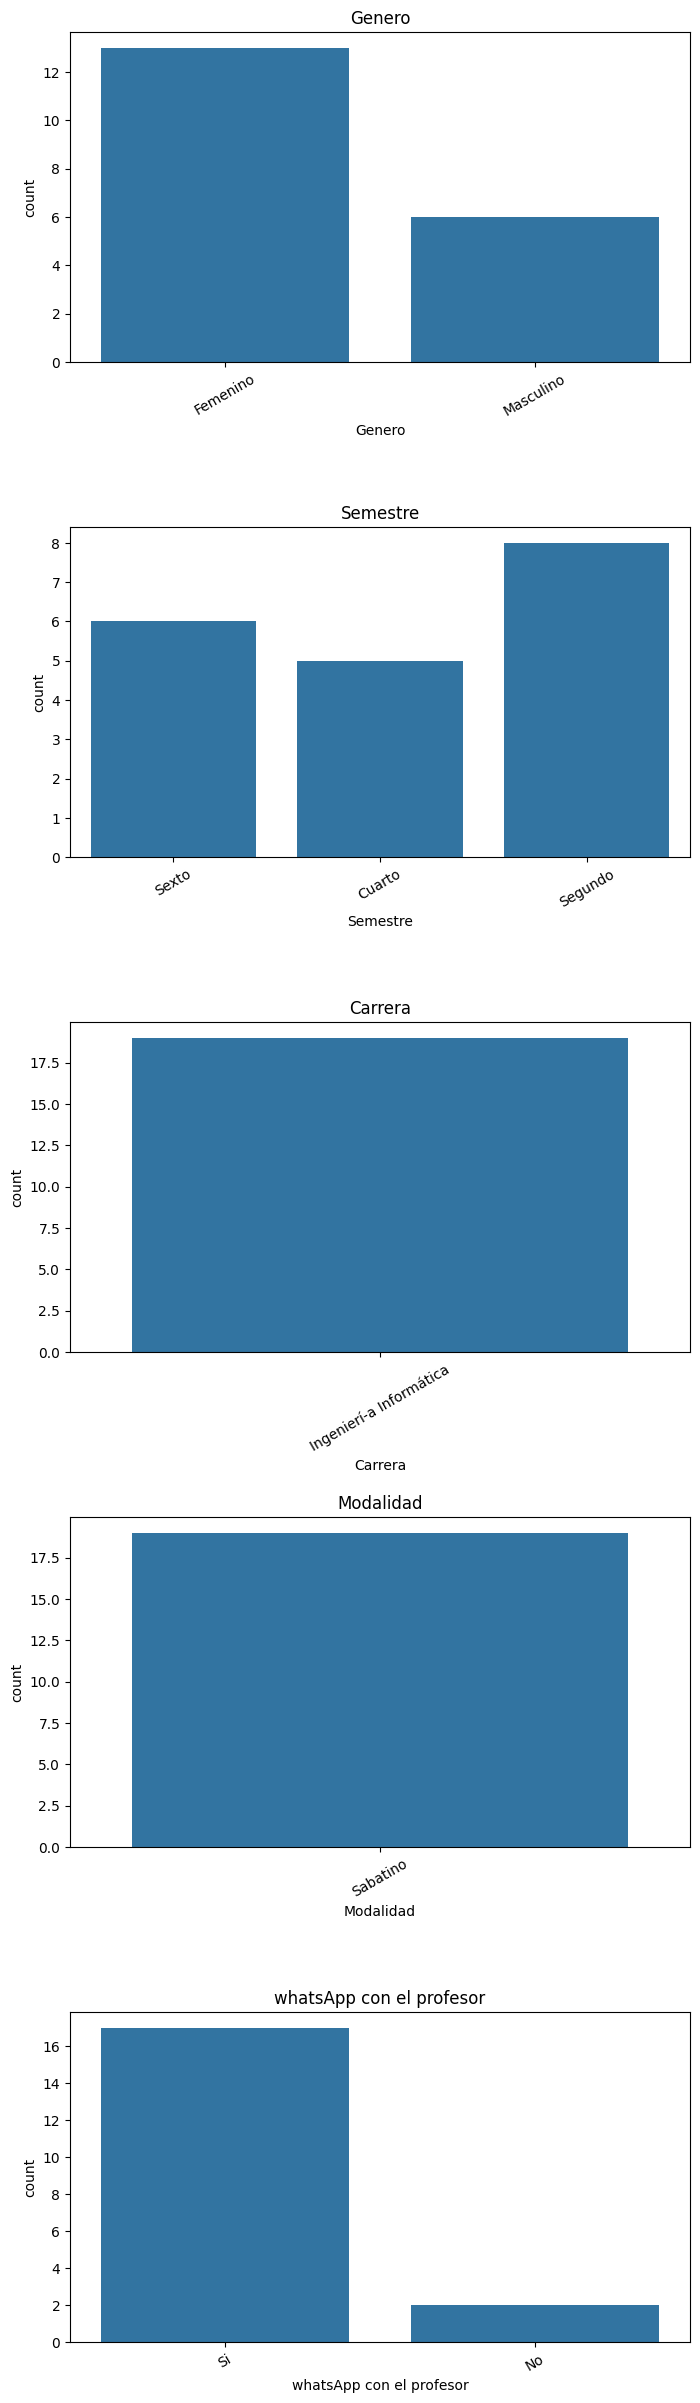

In [ ]:
###variables categoricas por niveles
col_cat = ['Genero','Semestre','Carrera','Modalidad','whatsApp con el profesor']
###grafico de barras para conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(data=df_mark, x=col, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)


In [ ]:
sex_={'Femenino':1,'Masculino':0}
df_mark2 = df_mark.loc[:,['Genero','Semestre','whatsApp con el profesor']]
df_mark3 = df_mark.loc[:,['Genero','Semestre','whatsApp con el profesor']]
df_mark2.head()

,Genero,Semestre,whatsApp con el profesor
0,Femenino,Sexto,Si
1,Femenino,Sexto,Si
2,Femenino,Sexto,Si
3,Femenino,Cuarto,Si
4,Masculino,Segundo,No


In [ ]:
df_mark3['Genero']= df_mark3['Genero'].map(sex_)
df_mark3.head(6)

,Genero,Semestre,whatsApp con el profesor
0,1,Sexto,Si
1,1,Sexto,Si
2,1,Sexto,Si
3,1,Cuarto,Si
4,0,Segundo,No
5,1,Cuarto,Si


In [ ]:
sem_ ={'Segundo':2,'Cuarto':4,'Sexto':6}
df_mark3['Semestre']= df_mark3['Semestre'].map(sem_)
df_mark3.head(10)

,Genero,Semestre,whatsApp con el profesor
0,1,6,Si
1,1,6,Si
2,1,6,Si
3,1,4,Si
4,0,2,No
5,1,4,Si
6,1,4,Si
7,0,2,Si
8,1,6,Si
9,1,2,Si


In [ ]:
whats_={'Si':1,'No':0}
df_mark3['whatsApp con el profesor'] = df_mark3['whatsApp con el profesor'].map(whats_)
df_mark3.head(10)

,Genero,Semestre,whatsApp con el profesor
0,1,6,1
1,1,6,1
2,1,6,1
3,1,4,1
4,0,2,0
5,1,4,1
6,1,4,1
7,0,2,1
8,1,6,1
9,1,2,1


In [ ]:
#convertir var genero
##categorica = df_mark.filter(["Genero","Semestre","Carrera","Modalidad","whatsApp con el profesor"])
#categorica.head(10)

numerica = df_mark.drop(["Genero","Semestre","Carrera","Modalidad","whatsApp con el profesor"], axis=1)
##numerica.head(5)

In [ ]:
#modificar las variables
##categorica.iloc[:,0]  #var genero

In [ ]:
##cat_numerica = pd.get_dummies(categorica.iloc[:,0], drop_first=True)
##cat_numerica


In [ ]:

#se convierten todas la categoricas
##cat_numerica =pd.get_dummies(categorica,drop_first=True)
##cat_numerica

In [ ]:
#concatenar variables

df_mark = pd.concat([numerica, df_mark3],axis=1)
df_mark.head()

,Marca_temporal,Nombre_de_usuario,Matricula,Edad,MER1,MIS1,MEI1,MIE1,D1,MIH1,MEY1,MER2,MIS2,MEI2,MIE2,D2,MIH2,MEY2,MER3,MIS3,MEI3,MIE3,D3,MIH3,MEY3,MER4,MIS4,MEI4,MIE4,D4,MIH4,MEY4,Genero,Semestre,whatsApp con el profesor
0,2024/04/13,a20050032@itsperote.edu.mx,20050032,22,6,6,6,5,6,5,4,4,5,6,5,4,6,5,4,5,5,5,5,5,5,5,6,5,5,5,5,5,1,6,1
1,2024/04/13,a21050013@itsperote.edu.mx,21050013,20,6,6,6,6,5,6,5,6,5,5,6,5,6,6,5,6,6,5,5,6,5,6,5,6,5,6,5,6,1,6,1
2,2024/04/13,a21050022@itsperote.edu.mx,21050022,20,1,7,7,7,4,7,7,7,7,7,7,4,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,1,6,1
3,2024/04/13,a22050042@itsperote.edu.mx,22050042,26,3,7,7,5,4,5,7,7,6,7,6,5,7,7,7,7,7,7,2,6,6,7,7,7,6,2,7,7,1,4,1
4,2024/04/13,a23050027@itsperote.edu.mx,23050027,27,4,4,4,1,1,4,3,3,4,5,4,4,4,4,5,3,4,3,6,3,5,4,3,3,4,2,2,3,0,2,0


In [ ]:
#conteo de valores faltantes para cada variable
df_mark.isnull().sum()

,0
Marca_temporal,0
Nombre_de_usuario,0
Matricula,0
Edad,0
MER1,0
MIS1,0
MEI1,0
MIE1,0
D1,0
MIH1,0


In [ ]:
#transformar la variable Dt_Customer que es un objeto, a formato de fecha
#df_mark['Dt_Customer']= pd.to_datetime(df_mark['Dt_Customer'], format="%d-%m-%Y")
#df_mark['Marca_temporal']= pd.to_datetime(df_mark['Marca_temporal'], format="%d-%m-%Y")
df_mark['Marca_temporal']= pd.to_datetime(df_mark['Marca_temporal'], format="%Y/%m/%d")


In [ ]:
df_mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Marca_temporal            19 non-null     datetime64[ns]
 1   Nombre_de_usuario         19 non-null     object        
 2   Matricula                 19 non-null     int64         
 3   Edad                      19 non-null     int64         
 4   MER1                      19 non-null     int64         
 5   MIS1                      19 non-null     int64         
 6   MEI1                      19 non-null     int64         
 7   MIE1                      19 non-null     int64         
 8   D1                        19 non-null     int64         
 9   MIH1                      19 non-null     int64         
 10  MEY1                      19 non-null     int64         
 11  MER2                      19 non-null     int64         
 12  MIS2                    

Limpieza de NA para Income

In [ ]:
#se remplazaran todos los valores faltantes, por la mediana de Income
#no aplica
##med_inc = df_mark['Income'].median()
##df_mark['Income'] = df_mark['Income'].fillna(med_inc)

In [ ]:
#para calcular la edad
##df_mark['edad'] = df_mark['Dt_Customer'].dt.year-df_mark['Year_Birth']

In [ ]:
#df_mark['edad'].describe()
df_mark['Edad'].describe()

,Edad
count,19.000000
mean,21.105263
std,2.601169
min,18.000000
25%,19.500000
50%,20.000000
75%,22.500000
max,27.000000


In [ ]:
#al observar el maximo de la variable edad = 21, sera necesario limpiar ese dato
#todos los valores superiores a 100 los cambie por la mediana
med_edad = df_mark['Edad'].median()
df_mark['Edad']=np.where(df_mark['Edad']>=100,med_edad,df_mark['Edad'])

In [ ]:
#Para hacer un cluster todas las variables deben ser cuantitativas, discretas o continuas
#df_mark['Z_CostContact'].unique()

In [ ]:
#df_mark['Z_Revenue'].unique()

In [ ]:
#creamos lista de variables, descartando las que no serviran
li_var =[]
li_var = list(li_var)
li_var = set(df_mark.columns)-set(['Marca_temporal','Nombre_de_usuario','Matricula','Modalidad','Carrera'])

**Analisis descriptivo**

In [ ]:
df_train = df_mark[list(li_var)].copy()

In [ ]:
df_train.head()

,MIS1,MEI1,MEI4,MEY4,MIH2,MER4,D1,MIH3,D4,whatsApp con el profesor,MIE2,MIE4,MIE1,MIS3,MEI2,D3,MER1,Semestre,MIS4,MER2,Genero,MIE3,MEY2,MIH1,MEY3,MER3,MIS2,MEI3,D2,MEY1,MIH4,Edad
0,6,6,5,5,6,5,6,5,5,1,5,5,5,5,6,5,6,6,6,4,1,5,5,5,5,4,5,5,4,4,5,22.0
1,6,6,6,6,6,6,5,6,6,1,6,5,6,6,5,5,6,6,5,6,1,5,6,6,5,5,5,6,5,5,5,20.0
2,7,7,7,7,7,7,4,7,7,1,7,7,7,7,7,7,1,6,7,7,1,7,7,7,7,7,7,7,4,7,7,20.0
3,7,7,7,7,7,7,4,6,2,1,6,6,5,7,7,2,3,4,7,7,1,7,7,5,6,7,6,7,5,7,7,26.0
4,4,4,3,3,4,4,1,3,2,0,4,4,1,3,5,6,4,2,3,3,0,3,4,4,5,5,4,4,4,3,2,27.0


In [ ]:
#convertir variables Semestre, whastApp

df_train.head()


,MIS1,MEI1,MEI4,MEY4,MIH2,MER4,D1,MIH3,D4,whatsApp con el profesor,MIE2,MIE4,MIE1,MIS3,MEI2,D3,MER1,Semestre,MIS4,MER2,Genero,MIE3,MEY2,MIH1,MEY3,MER3,MIS2,MEI3,D2,MEY1,MIH4,Edad
0,6,6,5,5,6,5,6,5,5,1,5,5,5,5,6,5,6,6,6,4,1,5,5,5,5,4,5,5,4,4,5,22.0
1,6,6,6,6,6,6,5,6,6,1,6,5,6,6,5,5,6,6,5,6,1,5,6,6,5,5,5,6,5,5,5,20.0
2,7,7,7,7,7,7,4,7,7,1,7,7,7,7,7,7,1,6,7,7,1,7,7,7,7,7,7,7,4,7,7,20.0
3,7,7,7,7,7,7,4,6,2,1,6,6,5,7,7,2,3,4,7,7,1,7,7,5,6,7,6,7,5,7,7,26.0
4,4,4,3,3,4,4,1,3,2,0,4,4,1,3,5,6,4,2,3,3,0,3,4,4,5,5,4,4,4,3,2,27.0


In [ ]:
df_train.describe()

,MIS1,MEI1,MEI4,MEY4,MIH2,MER4,D1,MIH3,D4,whatsApp con el profesor,MIE2,MIE4,MIE1,MIS3,MEI2,D3,MER1,Semestre,MIS4,MER2,Genero,MIE3,MEY2,MIH1,MEY3,MER3,MIS2,MEI3,D2,MEY1,MIH4,Edad
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,5.315789,5.736842,5.578947,5.684211,5.526316,5.842105,2.736842,5.526316,3.157895,0.894737,5.157895,4.789474,4.631579,5.526316,5.789474,3.315789,4.578947,3.789474,5.631579,5.842105,0.684211,4.947368,5.789474,5.684211,5.631579,5.736842,5.526316,5.578947,2.894737,5.894737,5.421053,21.105263
std,1.600439,1.758854,1.835326,1.973509,1.711673,1.641922,1.726979,1.611363,2.291607,0.315302,1.641922,1.685854,2.165654,1.678902,1.436777,2.286497,1.773753,1.750522,1.673669,1.500487,0.477567,1.809656,1.134262,1.376494,1.382852,1.521772,1.389181,1.464991,1.594948,1.410072,1.709964,2.601169
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,1.000000,4.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,18.000000
25%,4.500000,5.000000,5.000000,5.000000,5.000000,5.500000,1.000000,5.000000,1.000000,1.000000,4.000000,4.500000,3.500000,5.000000,5.000000,1.000000,3.500000,2.000000,5.000000,5.000000,0.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.500000,5.000000,5.000000,19.500000
50%,6.000000,6.000000,6.000000,7.000000,6.000000,6.000000,3.000000,6.000000,2.000000,1.000000,6.000000,5.000000,5.000000,6.000000,6.000000,2.000000,5.000000,4.000000,6.000000,6.000000,1.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.000000,7.000000,6.000000,20.000000
75%,6.500000,7.000000,7.000000,7.000000,7.000000,7.000000,4.000000,7.000000,5.000000,1.000000,6.000000,6.000000,6.500000,7.000000,7.000000,5.500000,6.000000,6.000000,7.000000,7.000000,1.000000,6.500000,7.000000,7.000000,6.500000,7.000000,7.000000,6.500000,4.000000,7.000000,7.000000,22.500000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,1.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,1.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,27.000000


In [ ]:
df_train.iloc[:,6]

,D1
0,6
1,5
2,4
3,4
4,1
5,2
6,5
7,1
8,4
9,1


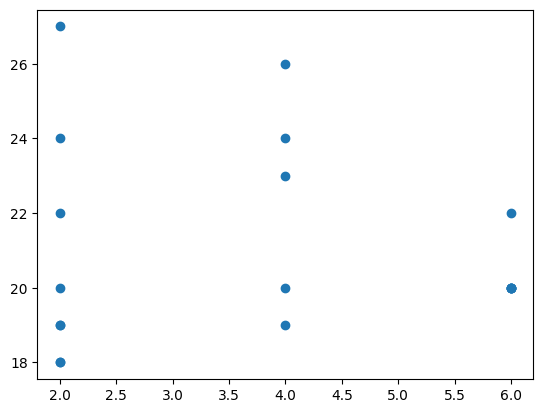

In [ ]:
#graficar como estan distribuidos los datos al ingresar
#ditribucion de x=semestre mientres que y =edad
plt.scatter(df_train.iloc[:,17],df_train.iloc[:,31])
plt.show()

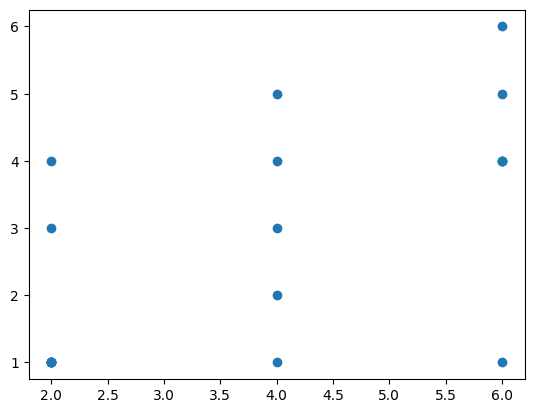

In [ ]:
#ditribucion de x=semestre mientres que y =desmotivacion
plt.scatter(df_train.iloc[:,17],df_train.iloc[:,6])
plt.show()

In [ ]:
#extraccion de variables de gastos

#li_varspend = [a for a in df_train.columns if a.startswith('Mnt')]    #gastos
#li_varspurh = [a for a in df_train.columns if a.endswith('Purchases')] #compras


In [ ]:
#df_train['spend_total']= df_train[li_varspend].sum(axis=1)
#df_train['Purchases_total']= df_train[li_varspurh].sum(axis=1)
#df_train['cant_hijos']= df_train['Kidhome'] + df_train['Teenhome']

In [ ]:
def plot_continuas(data, lista, fila, columna, top=1.9,hspace=0.7):
  plt.figure(figsize = (15,6))
  plt.subplots_adjust(top=top, hspace=hspace)
  for i,j in enumerate(sorted(lista)):
    plt.subplot(fila,columna,i+1)
    sns.boxplot(data[j])
    plt.title(f'{j}')
    plt.xlabel(' ')


In [ ]:
#
#li_varnum = set(df_train.columns)-set(['Kidhome','Teenhome'])
li_varnum = set(df_train.columns)


In [ ]:
#len(li_varnum)
len(li_varnum)

32

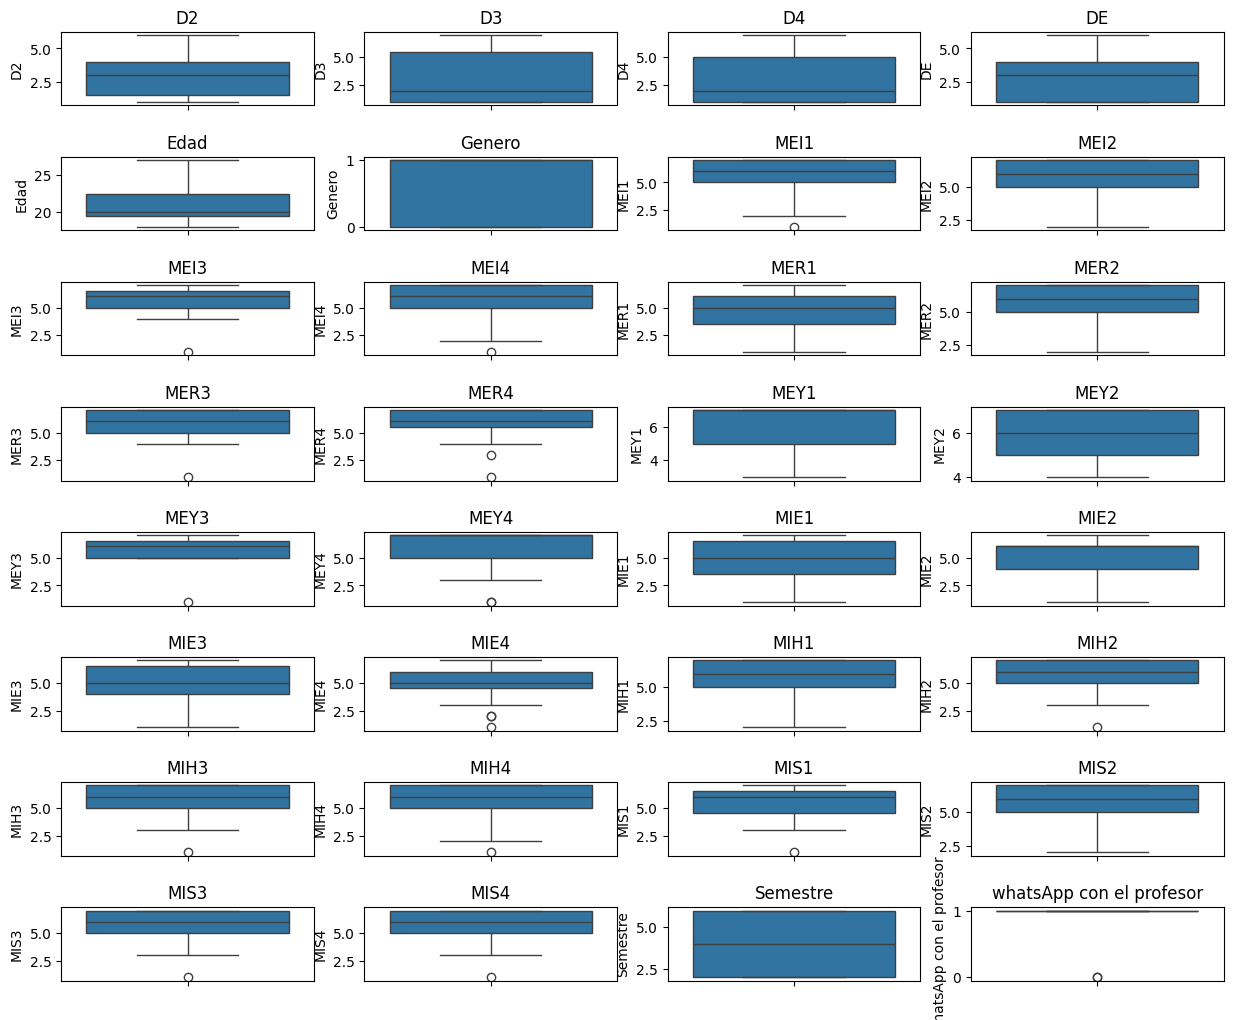

In [ ]:
#plot_continuas(df_train, li_varnum, 6,3)
#acomodar los graficos en forma 4 columnas por 9 filas
plot_continuas(df_train, li_varnum, 9,4)

In [ ]:
df_train_v2= df_train[list(li_varnum)].copy()
correlation_matriz = df_train_v2.corr().round(2)
correlation_matriz


,MEI4,MEI3,MER2,MEY1,MIE3,Semestre,MIH3,MIH2,MEI2,Genero,MIE1,MIE4,MEY2,MIS2,D3,MEY4,D4,MIH4,MIE2,DE,D2,MER1,MIS4,MEY3,MER3,whatsApp con el profesor,MIS3,MEI1,MER4,Edad,MIH1,MIS1
MEI4,1.00,0.84,0.78,0.75,0.38,0.25,0.53,0.76,0.83,0.35,0.34,0.72,0.81,0.57,-0.36,0.91,-0.23,0.50,0.37,-0.16,0.02,0.04,0.96,0.48,0.77,0.69,0.91,0.96,0.90,-0.19,0.78,0.69
MEI3,0.84,1.00,0.63,0.81,0.60,0.31,0.76,0.85,0.77,0.20,0.51,0.68,0.81,0.58,-0.16,0.84,-0.11,0.74,0.63,-0.16,-0.04,0.08,0.79,0.71,0.89,0.38,0.95,0.82,0.92,0.06,0.87,0.79
MER2,0.78,0.63,1.00,0.78,0.26,0.37,0.36,0.66,0.81,0.62,0.27,0.60,0.80,0.71,-0.34,0.85,-0.19,0.42,0.24,-0.08,0.13,-0.03,0.82,0.13,0.61,0.78,0.74,0.78,0.73,-0.29,0.67,0.55
MEY1,0.75,0.81,0.78,1.00,0.59,0.26,0.73,0.76,0.70,0.28,0.53,0.62,0.82,0.74,-0.21,0.81,-0.08,0.78,0.54,-0.17,-0.13,0.05,0.74,0.61,0.79,0.47,0.87,0.73,0.83,-0.24,0.84,0.70
MIE3,0.38,0.60,0.26,0.59,1.00,0.14,0.66,0.66,0.36,0.24,0.87,0.65,0.64,0.63,0.08,0.40,0.19,0.91,0.92,0.12,0.11,-0.11,0.34,0.68,0.56,-0.01,0.59,0.34,0.46,0.04,0.55,0.72
Semestre,0.25,0.31,0.37,0.26,0.14,1.00,0.24,0.41,0.42,0.45,0.18,0.29,0.20,0.28,0.41,0.43,0.54,0.18,0.21,0.61,0.47,0.15,0.28,0.10,0.14,0.36,0.30,0.38,0.37,-0.07,0.34,0.42
MIH3,0.53,0.76,0.36,0.73,0.66,0.24,1.00,0.62,0.46,0.16,0.70,0.47,0.55,0.49,0.18,0.53,0.23,0.76,0.66,0.05,-0.11,0.35,0.45,0.72,0.65,0.12,0.73,0.50,0.66,-0.04,0.68,0.71
MIH2,0.76,0.85,0.66,0.76,0.66,0.41,0.62,1.00,0.79,0.35,0.62,0.87,0.86,0.83,-0.10,0.84,-0.05,0.74,0.66,-0.03,0.22,0.04,0.77,0.58,0.72,0.42,0.90,0.82,0.84,0.07,0.85,0.87
MEI2,0.83,0.77,0.81,0.70,0.36,0.42,0.46,0.79,1.00,0.55,0.24,0.76,0.72,0.70,-0.15,0.88,-0.16,0.45,0.39,-0.07,0.18,0.09,0.87,0.32,0.76,0.56,0.81,0.90,0.83,0.04,0.72,0.68
Genero,0.35,0.20,0.62,0.28,0.24,0.45,0.16,0.35,0.55,1.00,0.26,0.40,0.38,0.52,0.10,0.42,0.25,0.17,0.28,0.50,0.39,0.03,0.40,-0.19,0.11,0.50,0.29,0.42,0.29,-0.15,0.18,0.36


<Axes: >

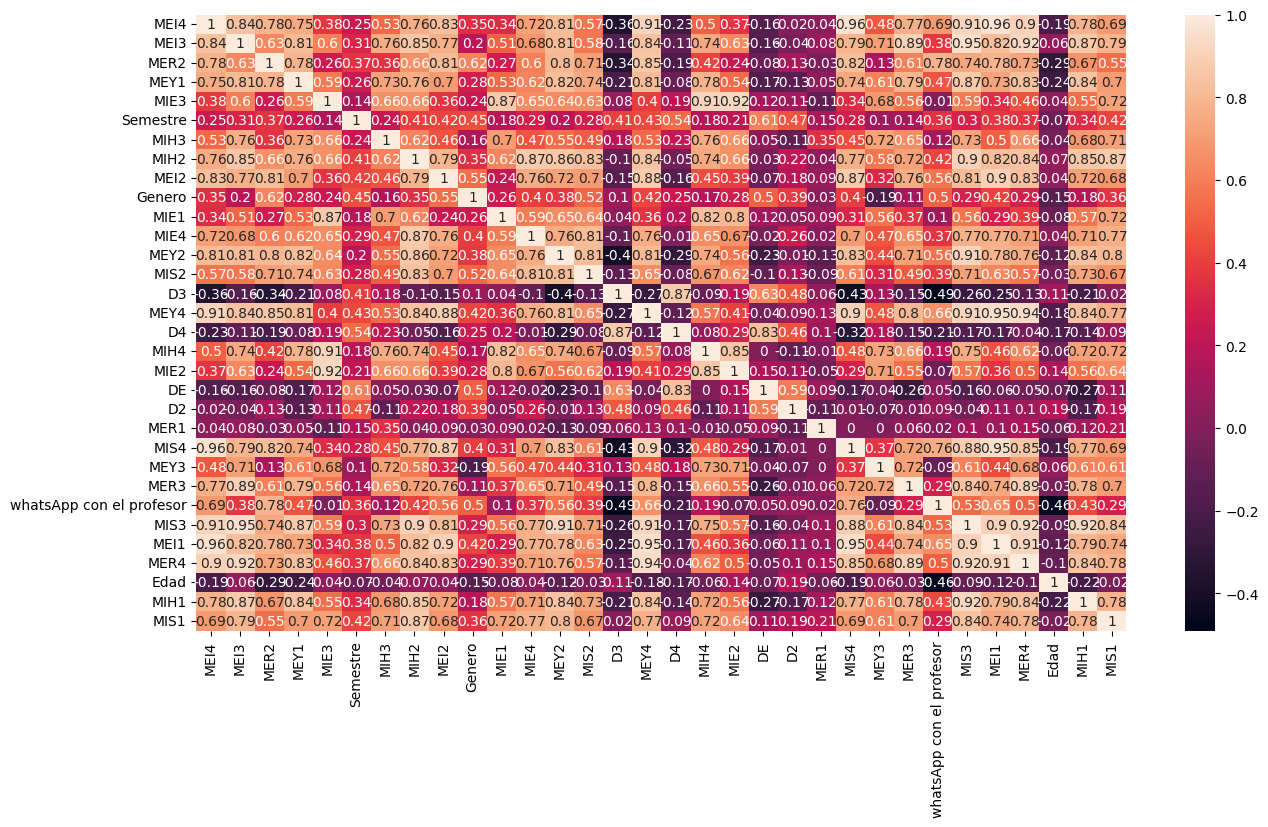

In [ ]:
#diagrama de calor para identificar correlacion
plt.figure(figsize=(15,8))
sns.heatmap(df_train_v2[list(li_varnum)].corr().round(2),annot=True)


**Limpieza y transformacion**

**Metodo de percentil**

Es una medida de posicion que divide la distribucion de datos en partes iguales

In [ ]:
#realizar limpieza
def fun_perc_atip(x,qmax,qmin):
  xmod=x.copy()
  dic_quanS = xmod.quantile(qmax)
  dic_quanI = xmod.quantile(qmin)

  xmod[xmod>dic_quanS] = dic_quanS
  xmod[xmod<dic_quanI] = dic_quanI

  return xmod

In [ ]:
#solo se seleccionan aquellos que requieran limpieza
#li_varlimp = ['edad','Recency','NumStorePurchases', 'cant_hijos','spend_total','Purchases_total']
li_varlimp = ['MEI1','MEI4','MER4', 'MIE4']

In [ ]:
#de todas las variables que no estan en varlim, esa seran tratadas
li_vatrat = [a for a in li_varnum if a not in li_varlimp]

In [ ]:
#seran tratadas 11 variables
len (li_vatrat)

28

In [ ]:
df_train_mod =df_train_v2[li_varlimp].copy()
for i in li_vatrat:
  df_train_mod[f'{i}_mod'] = fun_perc_atip(df_train_v2[i],0.97,0.03)

In [ ]:
#nuevo datframe con 17 variables
df_train_mod.head()

,MEI1,MEI4,MER4,MIE4,MEI3_mod,MER2_mod,MEY1_mod,MIE3_mod,Semestre_mod,MIH3_mod,MIH2_mod,MEI2_mod,Genero_mod,MIE1_mod,MEY2_mod,MIS2_mod,D3_mod,MEY4_mod,D4_mod,MIH4_mod,MIE2_mod,DE_mod,D2_mod,MER1_mod,MIS4_mod,MEY3_mod,MER3_mod,whatsApp con el profesor_mod,MIS3_mod,Edad_mod,MIH1_mod,MIS1_mod
0,6,5,5,5,5.0,4.0,4,5.0,6,5.0,6.0,6.0,1,5,5,5.0,5,5,5,5.0,5.0,5.46,4.0,6.00,6.0,5.0,4.0,1,5.0,22.00,5.0,6.0
1,6,6,6,5,6.0,6.0,5,5.0,6,6.0,6.0,5.0,1,6,6,5.0,5,6,6,5.0,6.0,5.00,5.0,6.00,5.0,5.0,5.0,1,6.0,20.00,6.0,6.0
2,7,7,7,7,7.0,7.0,7,7.0,6,7.0,7.0,7.0,1,7,7,7.0,7,7,7,7.0,7.0,4.00,4.0,1.54,7.0,7.0,7.0,1,7.0,20.00,7.0,7.0
3,7,7,7,6,7.0,7.0,7,7.0,4,6.0,7.0,7.0,1,5,7,6.0,2,7,2,7.0,6.0,4.00,5.0,3.00,7.0,6.0,7.0,1,7.0,26.00,5.0,7.0
4,4,3,4,4,4.0,3.0,3,3.0,2,3.0,4.0,5.0,0,1,4,4.0,6,3,2,2.0,4.0,1.00,4.0,4.00,3.0,5.0,5.0,0,3.0,26.46,4.0,4.0


ValueError: num must be an integer with 1 <= num <= 30, not 31

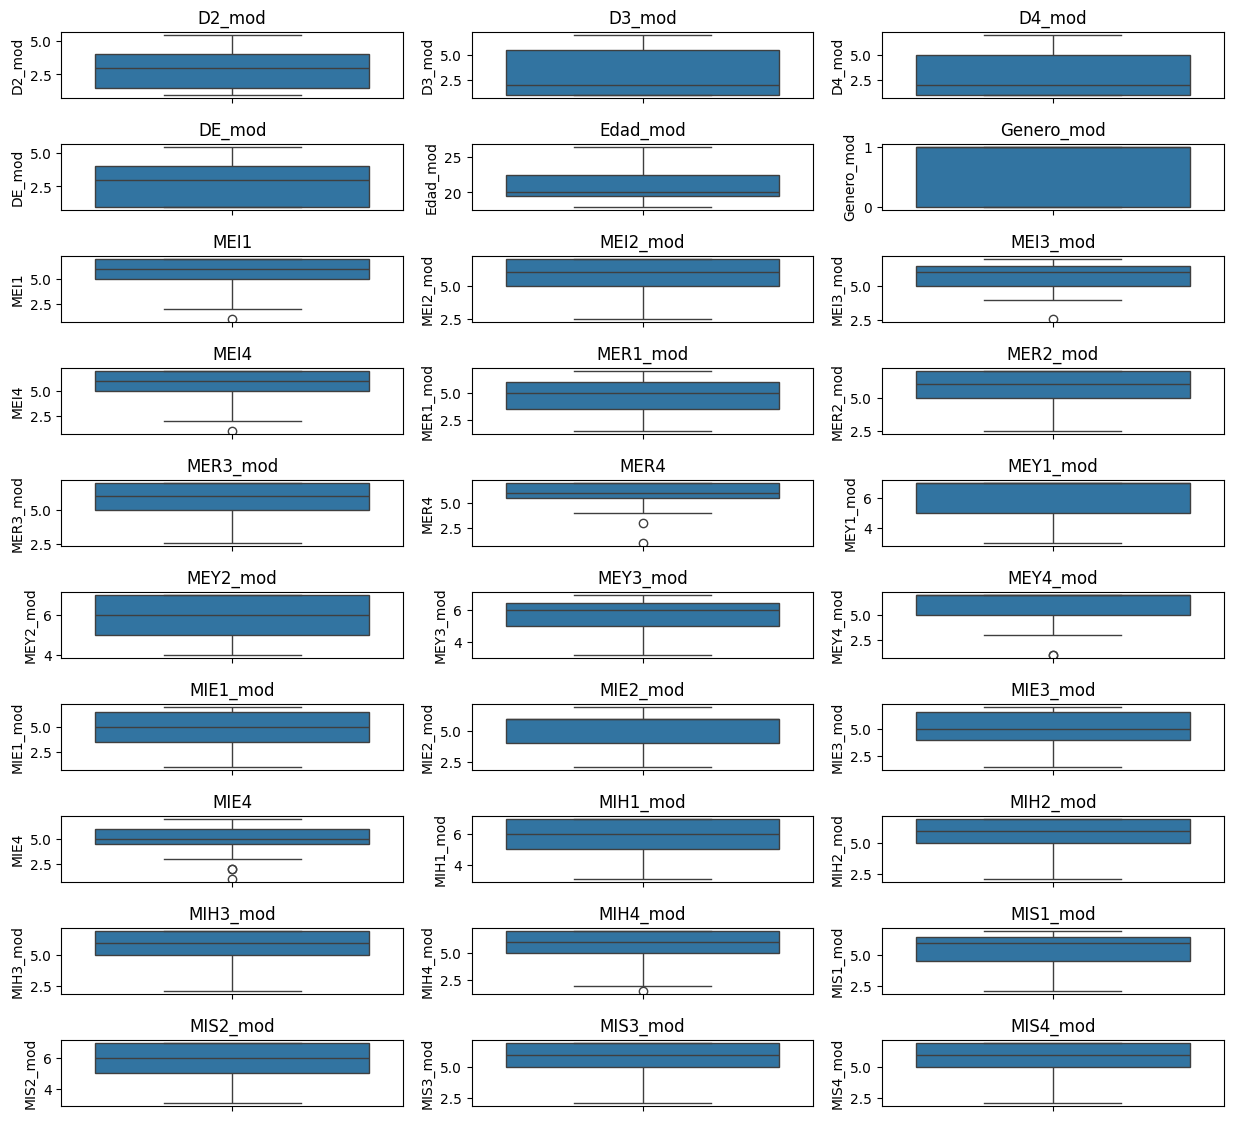

In [ ]:
plot_continuas(df_train_mod,set(df_train_mod.columns),10,3)

#plot_continuas(df_train, li_varnum, 9,4)

**Transformacion Logaritmica**

para que deje de mostrar variables atipicas

In [ ]:
#lista de variables a transformar
#li_varconv = ['MntFishProducts_mod', 'MntFishProducts_mod','MntMeatProducts_mod','MntSweetProducts_mod','MntFruits_mod']
li_varconv = ['MEI1', 'MEI4','MEI3_mod','MER4','MEY4_mod']

In [ ]:
df_var_log = df_train_mod[li_varconv].apply(np.log1p).rename(columns=lambda x:'log_'+x)
df_var_log.head()

,log_MEI1,log_MEI4,log_MEI3_mod,log_MER4,log_MEY4_mod
0,1.945910,1.791759,1.791759,1.791759,1.791759
1,1.945910,1.945910,1.945910,1.945910,1.945910
2,2.079442,2.079442,2.079442,2.079442,2.079442
3,2.079442,2.079442,2.079442,2.079442,2.079442
4,1.609438,1.386294,1.609438,1.609438,1.386294


In [ ]:
x_train = pd.concat([df_train_mod.drop(li_varconv,axis=1),df_var_log],axis=1)

ValueError: num must be an integer with 1 <= num <= 21, not 22

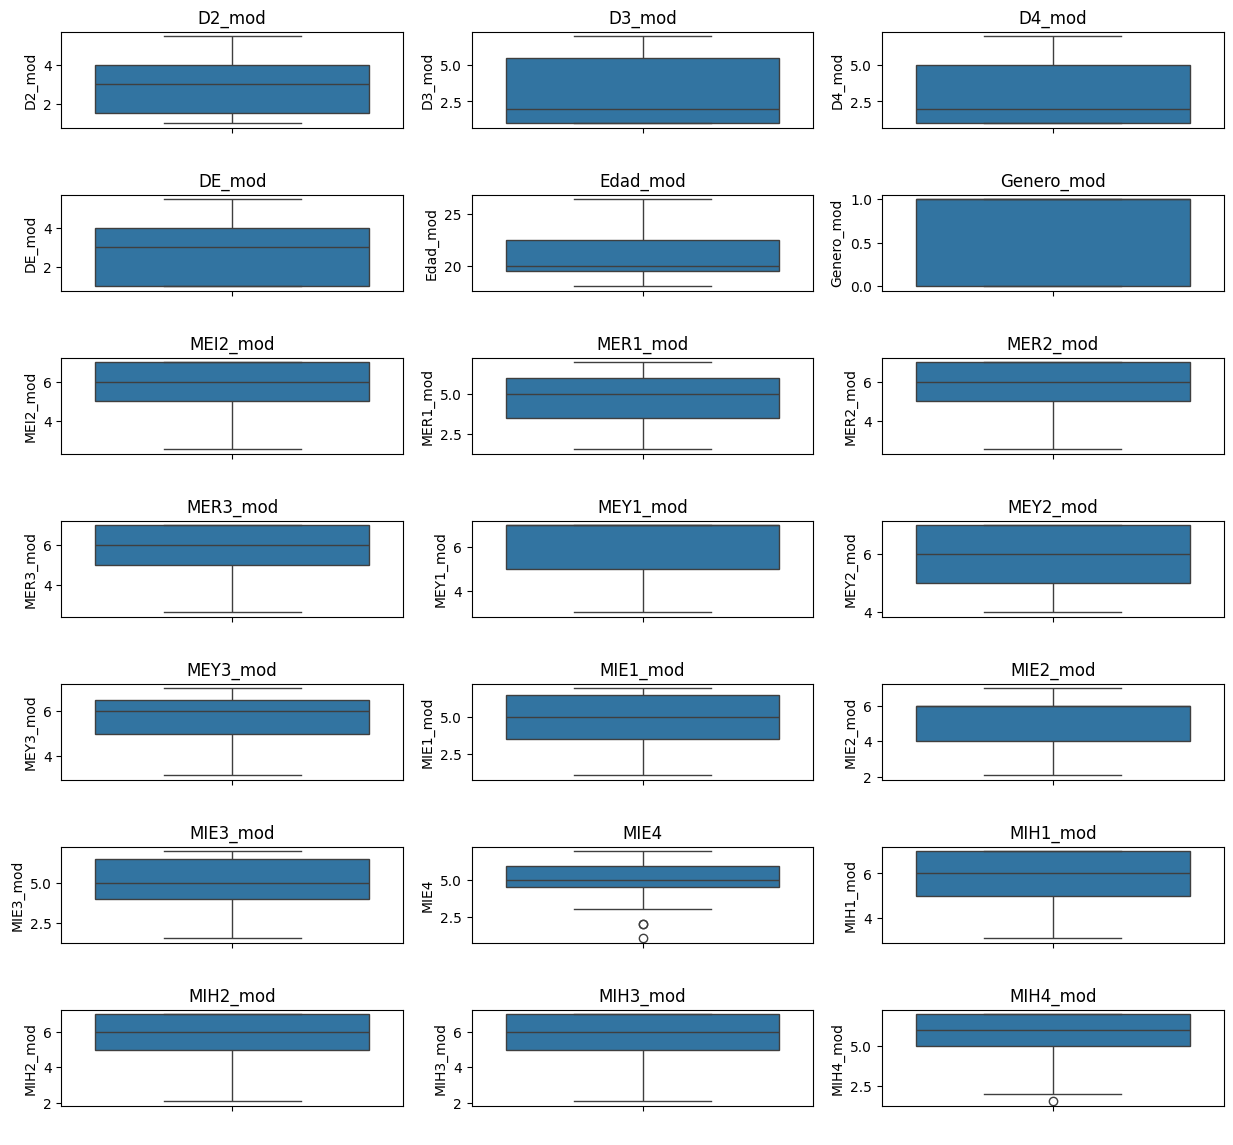

In [ ]:
plot_continuas(x_train,set(x_train.columns),7,3)

In [ ]:
x_train.shape

(19, 32)

**Reduccion dimenciones: componentes **principales

PCA (Análisis de Componente Principal)
Es un algoritmo matemático para reducir la dimensión de un conjunto de datos, con el fin de simplificar el número de variables mientras se retiene la mayor parte de información. Este intercambio de exactitud por simplicidad es muy usado para encontrar patrones en grandes segmentos de datos.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
trans = MinMaxScaler()
trans_scal = trans.fit_transform(x_train)

In [ ]:
pca = PCA().fit(trans_scal)
ar_varianza =pca.explained_variance_ratio_

Text(0, 0.5, 'Suma acumulada')

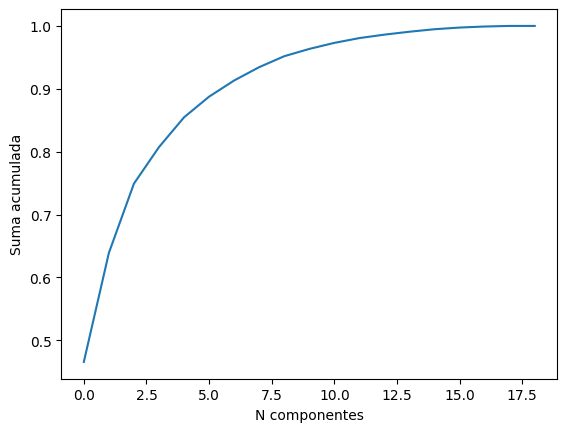

In [ ]:
plt.plot(np.cumsum(ar_varianza))
plt.xlabel('N componentes')
plt.ylabel("Suma acumulada")

In [ ]:
np.cumsum(ar_varianza)

array([0.46573591, 0.63905016, 0.74922236, 0.8072952 , 0.85465087,
       0.88751911, 0.91320763, 0.9344315 , 0.95181686, 0.96342118,
       0.97302765, 0.98067825, 0.9861456 , 0.9907657 , 0.99476115,
       0.9974081 , 0.99905872, 1.        , 1.        ])

In [ ]:
#de acuerdo con la grafica superior se requieren 5 componentes para el 80%
mod_pca=PCA(5)
# de 16 dimensiones ahora solo quedaran 5
pca_value_trans = mod_pca.fit_transform(trans_scal)

In [ ]:
sum(mod_pca.explained_variance_ratio_)

0.8546508699067726

In [ ]:
df_comp = pd.DataFrame(pca_value_trans,columns=['PC1','PC2','PC3','PC4','PC5'])

In [ ]:
df_comp.head()

,PC1,PC2,PC3,PC4,PC5
0,0.340620,-1.048030,-0.363142,-0.055763,0.096429
1,-0.165341,-1.083962,-0.255385,-0.095123,-0.102675
2,-1.400657,-1.009602,0.336569,0.015391,0.137852
3,-1.042909,-0.150488,-0.052623,0.384171,0.709517
4,2.174516,0.228549,0.193551,-0.304980,1.120816


**Analisis Clustering**

In [ ]:
from sklearn.cluster import KMeans

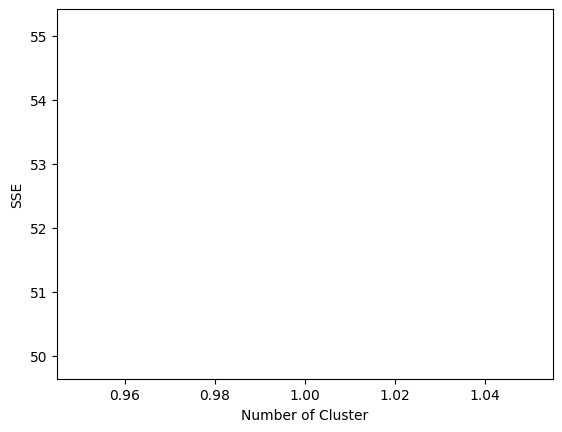

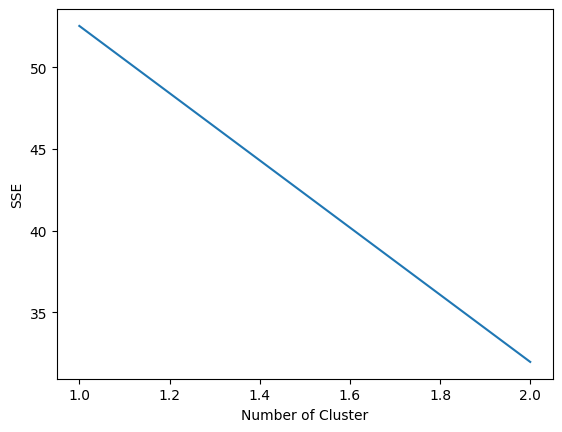

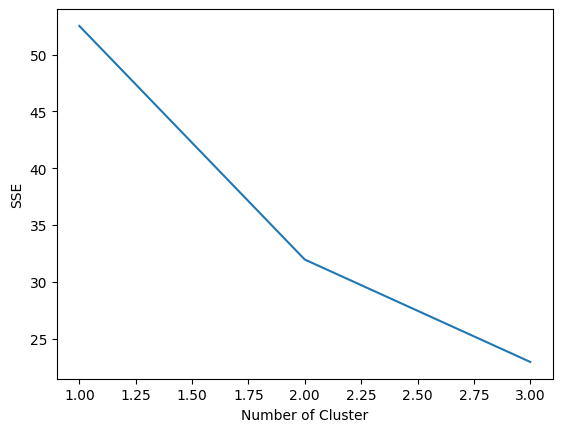

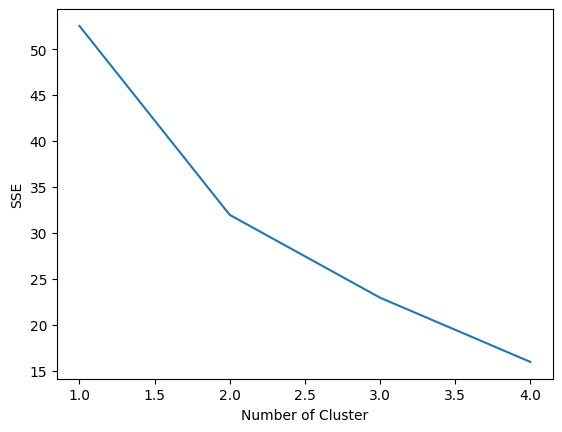

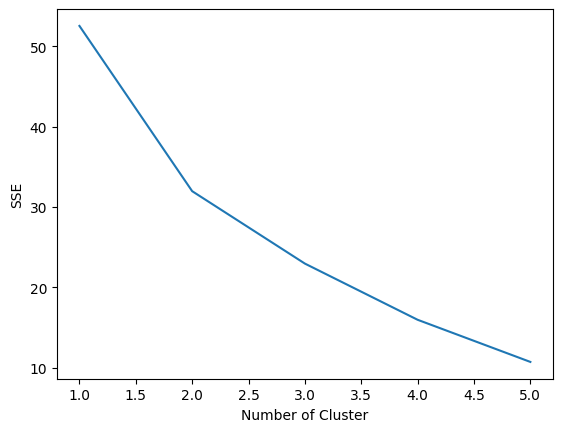

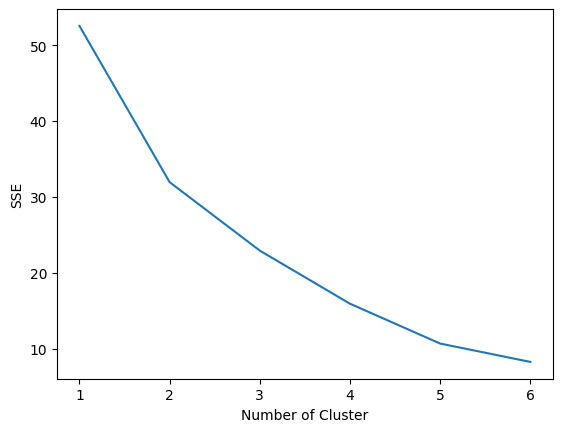

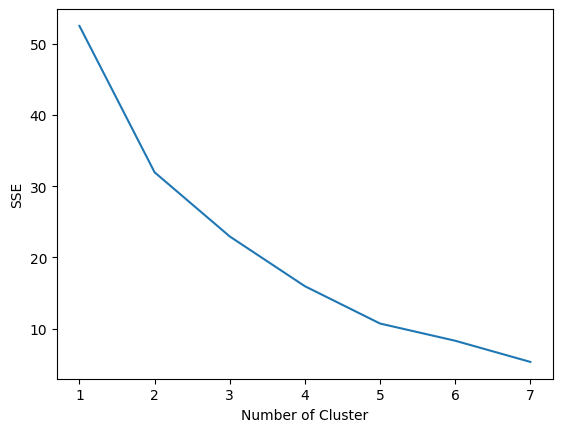

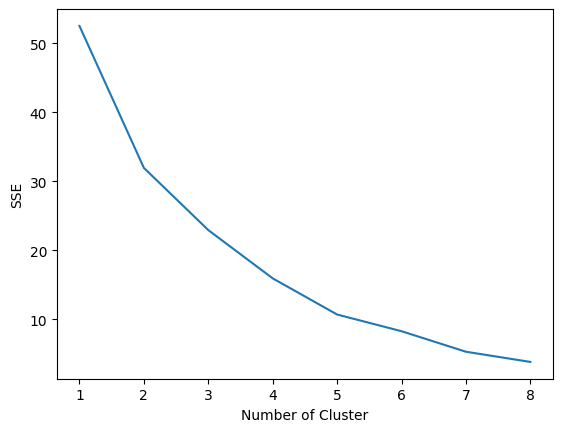

In [ ]:
#calcular la metrica SSE sum of Square Error para diferentes K
sse={}
for k in range(1,9):
  Kmeans = KMeans(n_clusters=k, max_iter=200,n_init=2).fit(pca_value_trans)
  sse[k] = Kmeans.inertia_   #inertia = suma de errores al cuadrado
  plt.figure()
  plt.plot(list(sse.keys()), list(sse.values()))
  plt.xlabel("Number of Cluster")
  plt.ylabel("SSE")
  plt.show()

  #CONSIDERA EL METODO DEL CODO PARA IDENTIFICAR EL NUMERO DE CLOSTER ADECUADO

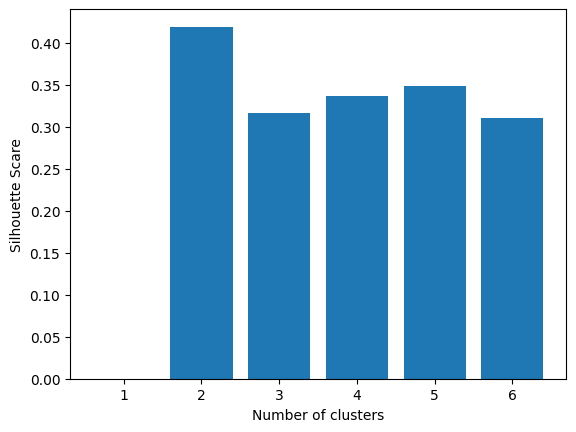

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [0]

for n_cluster in range(2, 7):
  silhouette_scores.append(silhouette_score(pca_value_trans, KMeans(n_clusters = n_cluster).fit_predict(pca_value_trans)))
k = [1, 2, 3, 4, 5, 6]
plt.bar(k,silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Scare', fontsize=10)
plt.show()

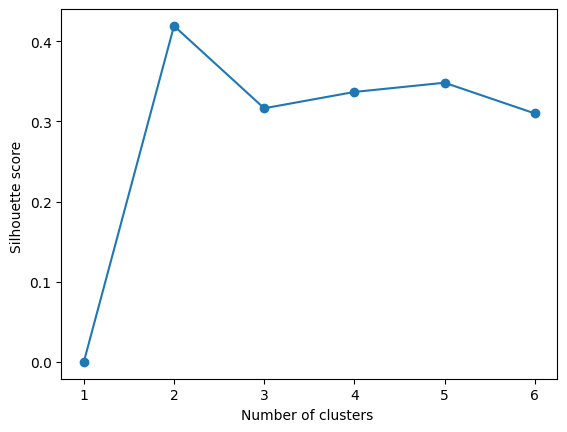

In [ ]:
#grafico de linea
plt.plot(k,silhouette_scores,marker='o')
plt.xlabel('Number of clusters ',fontsize=10)
plt.ylabel('Silhouette score ',fontsize=10)
plt.show()

In [ ]:
#usaremos tres cluster
Kmeans_kpi=KMeans(n_clusters=3,random_state=43)
Kmeans_kpi.fit(pca_value_trans)




KMeans(n_clusters=3, random_state=43)

In [ ]:
centroids = Kmeans_kpi.cluster_centers_
print(centroids)

[[ 1.78542841e+00  3.50672643e-01  1.84351589e-01  6.59269331e-04
   4.84978805e-02]
 [-9.47851364e-01  5.44279864e-01  1.30958752e-01  1.37884643e-01
   2.33564055e-02]
 [-3.27454644e-01 -7.94760323e-01 -2.62638458e-01 -1.38355550e-01
  -5.79977487e-02]]


In [ ]:
df_comp['cluster']=Kmeans_kpi.labels_
df_train_mod['cluster']=Kmeans_kpi.labels_

In [ ]:
#que porcentaje hay en cada cluster
df_comp['cluster'].value_counts()/len(df_comp)

cluster
2    0.368421
1    0.368421
0    0.263158
Name: count, dtype: float64

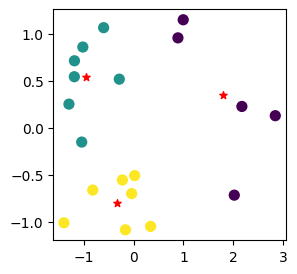

In [ ]:
#plot in clústers
plt.figure(figsize=(3,3))
plt.scatter(df_comp['PC1'],df_comp['PC2'],c=df_comp['cluster'],s=50)
plt.scatter(centroids[:,0],centroids[:,1],c='red',marker='*',s=30)



In [ ]:
#prediction
clust = Kmeans_kpi.predict(pca_value_trans)
print(clust)

[2 2 2 1 0 1 2 1 2 1 1 1 0 0 2 0 2 1 0]


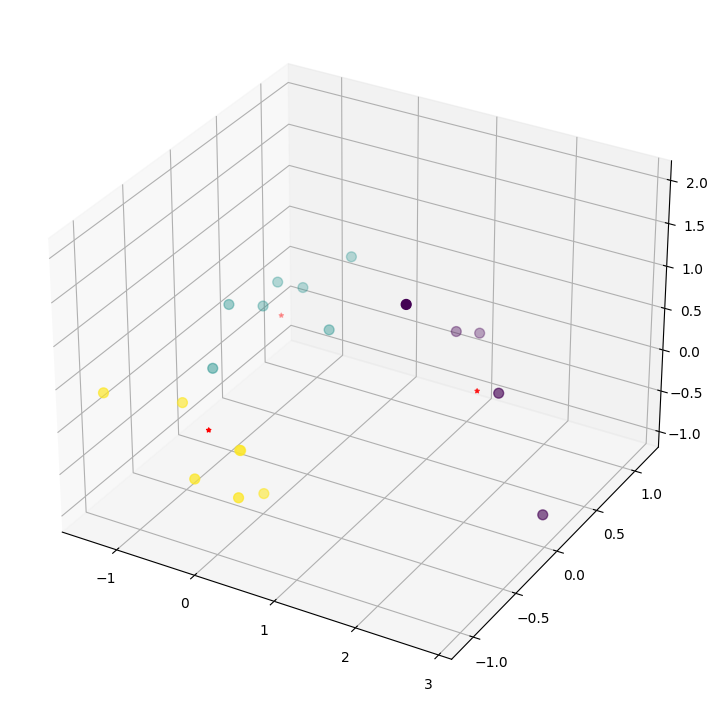

In [ ]:
# plot in 3D

fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_comp['PC1'],df_comp['PC2'],df_comp['PC3'],c=df_comp['cluster'],s=50)
ax.scatter(centroids[:,0],centroids[:,1],c='red',marker='*',s=10)
plt.show()